<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('/var/python/Elongation_final.xlsx')

df_clean = df.dropna()

df_clean = df.fillna(0)

df_clean



,Unnamed: 0,C,Mn,Si,S,Al,Cr,Mo,P,Nb,Martensite Carbon,Fe,V,Cu,B,Yield Strength (MPa),UTS (MPa),Elongation (%)
0,0,0.05,1.20,0.60,0.000,0.0,0.05,0.0,0.000,0.0,0.0,98.100,0.0,0.0,0.0,400,630,27
1,1,0.10,1.00,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.600,0.0,0.0,0.0,370,635,24.5
2,2,0.15,1.40,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.150,0.0,0.0,0.0,600,760,16.6
3,3,0.10,1.60,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.000,0.0,0.0,0.0,480,830,18.2
4,4,0.15,1.40,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.150,0.0,0.0,0.0,600,1030,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,0.09,1.34,0.01,0.003,0.0,0.02,0.0,0.013,0.0,0.0,98.524,0.0,0.0,0.0,556,1048,4.2
171,171,0.16,1.03,0.24,0.000,0.0,0.14,0.0,0.000,0.0,0.0,98.430,0.0,0.0,0.0,360,703,10
172,172,0.16,1.03,0.24,0.000,0.0,0.14,0.0,0.000,0.0,0.0,98.430,0.0,0.0,0.0,365,694,17.3
173,173,0.16,1.03,0.24,0.000,0.0,0.14,0.0,0.000,0.0,0.0,98.430,0.0,0.0,0.0,459,835,7.29


In [132]:
df = df_clean.drop('Unnamed: 0', axis=1)
df

,C,Mn,Si,S,Al,Cr,Mo,P,Nb,Martensite Carbon,Fe,V,Cu,B,Yield Strength (MPa),UTS (MPa),Elongation (%)
0,0.05,1.20,0.60,0.000,0.0,0.05,0.0,0.000,0.0,0.0,98.100,0.0,0.0,0.0,400,630,27
1,0.10,1.00,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.600,0.0,0.0,0.0,370,635,24.5
2,0.15,1.40,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.150,0.0,0.0,0.0,600,760,16.6
3,0.10,1.60,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.000,0.0,0.0,0.0,480,830,18.2
4,0.15,1.40,0.30,0.000,0.0,0.00,0.0,0.000,0.0,0.0,98.150,0.0,0.0,0.0,600,1030,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.09,1.34,0.01,0.003,0.0,0.02,0.0,0.013,0.0,0.0,98.524,0.0,0.0,0.0,556,1048,4.2
171,0.16,1.03,0.24,0.000,0.0,0.14,0.0,0.000,0.0,0.0,98.430,0.0,0.0,0.0,360,703,10
172,0.16,1.03,0.24,0.000,0.0,0.14,0.0,0.000,0.0,0.0,98.430,0.0,0.0,0.0,365,694,17.3
173,0.16,1.03,0.24,0.000,0.0,0.14,0.0,0.000,0.0,0.0,98.430,0.0,0.0,0.0,459,835,7.29


In [133]:
df.describe()

,C,Mn,Si,S,Al,Cr,Mo,P,Nb,Martensite Carbon,Fe,V,Cu,B
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.183200,1.802326,0.442160,0.059282,0.178086,0.548709,0.117811,0.015518,0.001286,0.011143,96.048386,0.008457,0.011714,0.000494
std,0.456671,3.060450,0.399233,0.458101,0.640937,2.148806,0.425023,0.025371,0.008272,0.075215,8.906561,0.034837,0.046528,0.001427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090000,1.150000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.779000,0.000000,0.000000,0.000000
50%,0.140000,1.490000,0.300000,0.004000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,97.678100,0.000000,0.000000,0.000000
75%,0.170000,2.000000,0.700000,0.010500,0.037500,0.545000,0.080000,0.020000,0.000000,0.000000,98.259300,0.000000,0.000000,0.000000
max,4.500000,29.200000,2.000000,4.500000,5.200000,18.000000,3.800000,0.160000,0.100000,0.600000,100.000000,0.200000,0.200000,0.005000


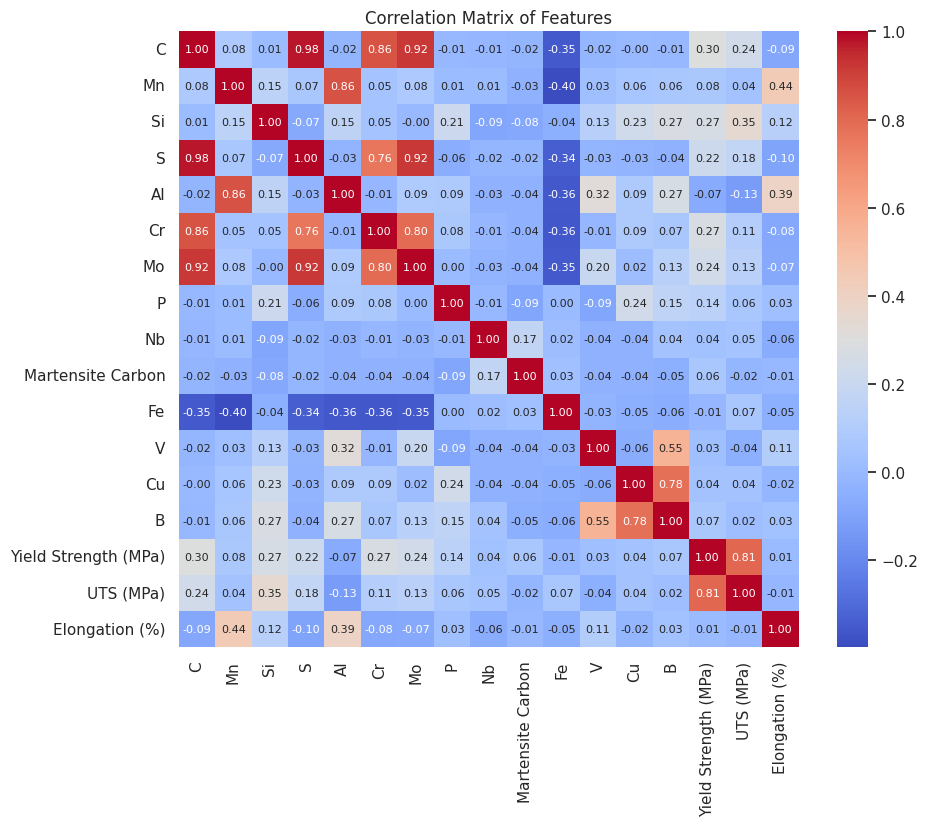

In [134]:
df = df.apply(pd.to_numeric, errors='coerce')
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Features')
plt.show()


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   C                     175 non-null    float64
 1   Mn                    175 non-null    float64
 2   Si                    175 non-null    float64
 3   S                     175 non-null    float64
 4   Al                    175 non-null    float64
 5   Cr                    175 non-null    float64
 6   Mo                    175 non-null    float64
 7   P                     175 non-null    float64
 8   Nb                    175 non-null    float64
 9   Martensite Carbon     175 non-null    float64
 10  Fe                    175 non-null    float64
 11  V                     175 non-null    float64
 12  Cu                    175 non-null    float64
 13  B                     175 non-null    float64
 14  Yield Strength (MPa)  173 non-null    float64
 15  UTS (MPa)             1

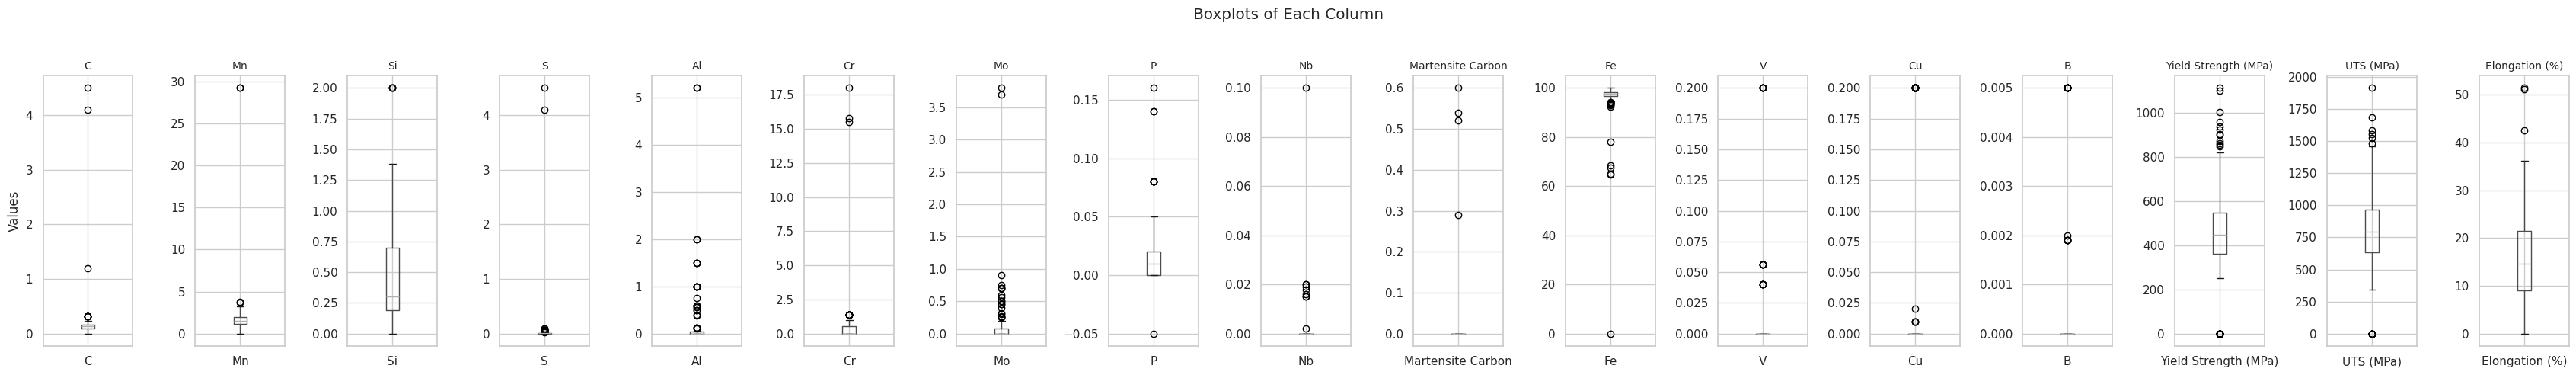

In [136]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(2 * len(numeric_columns), 5))
fig.suptitle("Boxplots of Each Column")

for i, column in enumerate(numeric_columns):
    df.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel("Values" if i == 0 else "")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


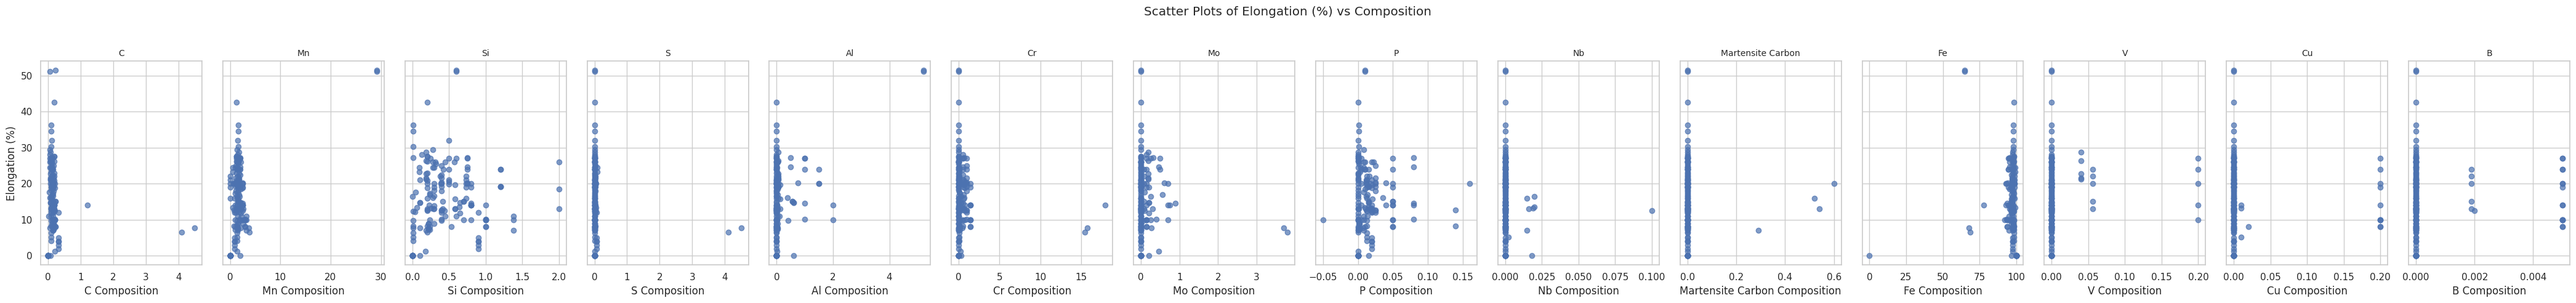

In [137]:

element_columns = ['C', 'Mn', 'Si', 'S', 'Al', 'Cr', 'Mo', 'P', 'Nb', 'Martensite Carbon', 'Fe', 'V', 'Cu', 'B']

fig, axes = plt.subplots(1, len(element_columns), figsize=(3 * len(element_columns), 5), sharey=True)
fig.suptitle("Scatter Plots of Elongation (%) vs Composition")

for i, element in enumerate(element_columns):
    axes[i].scatter(df[element], df['Elongation (%)'], alpha=0.7)
    axes[i].set_title(element, fontsize=10)
    axes[i].set_xlabel(f"{element} Composition")
    if i == 0:
        axes[i].set_ylabel("Elongation (%)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
